In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('car.csv')
print(df.shape)
df.head()
# our target is Selling_Price

(301, 9)


Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [3]:
# a deeler or a person is selling 
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Car_Name'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Act

In [4]:
# since there are a lot of Car_Names, it wouldn't have much impact so we will drop it
df.drop('Car_Name', axis=1, inplace=True) 

In [5]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   299.000000     299.000000     299.000000     299.000000  299.000000
mean   2013.615385       4.589632       7.541037   36916.752508    0.043478
std       2.896868       4.984240       8.567887   39015.170352    0.248720
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.850000       1.200000   15000.000000    0.000000
50%    2014.000000       3.510000       6.100000   32000.000000    0.000000
75%    2016.000000       6.000000       9.840000   48883.500000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [8]:
# we want to change Year and find out how many that car have lived

# creating a new column to store the current year
from datetime import datetime
current_year = datetime.now().year
df['current_year'] = current_year

# storing car's lifespan
df['car_age'] = df['current_year'] - df['Year'] 
df.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  current_year  car_age  
0       Manual      0          2025       11  
1       Manual      0          2025       12  
2       Manual      0          2025        8  
3       Manual      0          2025       14  
4       Manual      0          2025       11

In [9]:
# we needn't 'Year' and 'current_year' column anymore
df.drop(['Year', 'current_year'], axis=1, inplace=True)
df.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  car_age  
0       Manual      0       11  
1       Manual      0       12  
2       Manual      0        8  
3       Manual      0       14  
4       Manual      0       11

In [10]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

Selling_Price  Present_Price  Kms_Driven  Owner  car_age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11                 0   
1           4.75           9.54       43000      0       12                 1   
2           7.25           9.85        6900      0        8                 0   
3           2.85           4.15        5200      0       14                 0   
4           4.60           6.87       42450      0       11                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

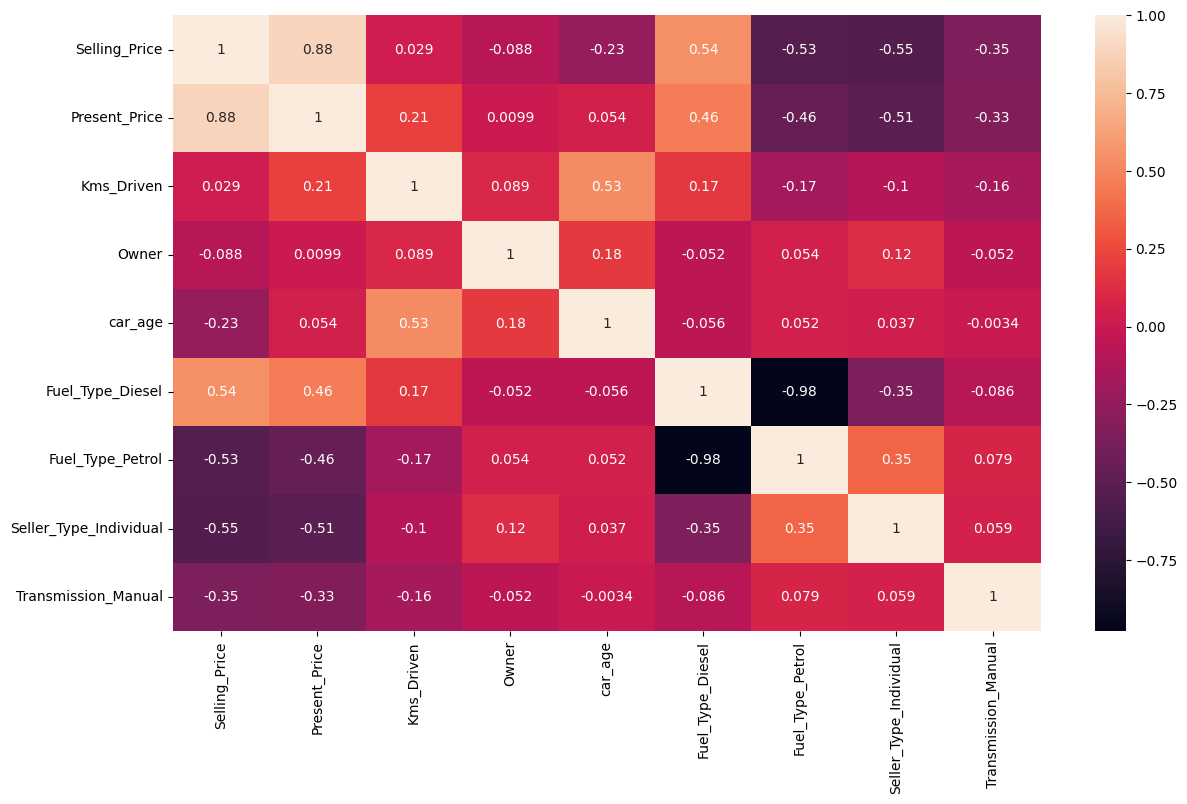

In [11]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True);

In [12]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [13]:
# Train and Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [14]:
# Create Model

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),
    ('rgr', ExtraTreesRegressor())
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rgr', ExtraTreesRegressor())])

In [15]:
model.named_steps['rgr'].feature_importances_ 

array([0.53472017, 0.02906864, 0.00107606, 0.09201356, 0.02805654,
       0.0166668 , 0.25949019, 0.03890804])

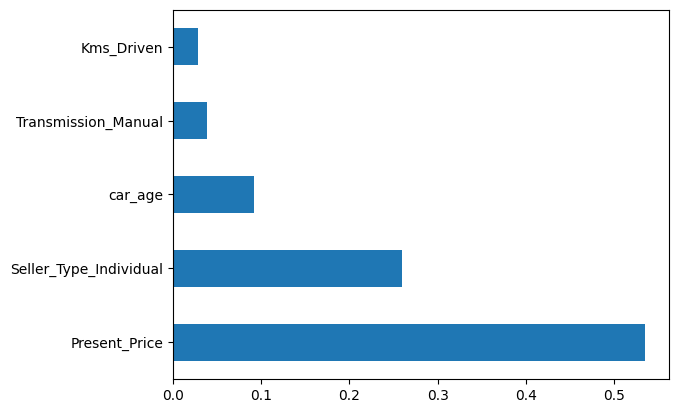

In [16]:
# creating a pd series of features and their coef
feat_imp = pd.Series(model.named_steps['rgr'].feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh');

In [17]:
# using another model
from sklearn.ensemble import RandomForestRegressor

model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('rfr', RandomForestRegressor())
])


from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(i) for i in np.linspace(100, 1200, 12)]
max_features = ['log2', 'sqrt']
max_depth = [int(i) for i in np.linspace(5, 20, 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {
    'rfr__n_estimators': n_estimators,
    'rfr__max_features': max_features,
    'rfr__max_depth': max_depth,
    'rfr__min_samples_split': min_samples_split,
    'rfr__min_samples_leaf': min_samples_leaf 
}

rf_model = RandomizedSearchCV(estimator=model2,
                              param_distributions=random_grid,
                              scoring='neg_mean_squared_error',
                              n_iter=10, 
                              cv=5, 
                              verbose=2,
                              random_state=0,
                              n_jobs=1)

rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END rfr__max_depth=20, rfr__max_features=sqrt, rfr__min_samples_leaf=2, rfr__min_samples_split=10, rfr__n_estimators=900; total time=   0.7s
[CV] END rfr__max_depth=20, rfr__max_features=sqrt, rfr__min_samples_leaf=2, rfr__min_samples_split=10, rfr__n_estimators=900; total time=   0.6s
[CV] END rfr__max_depth=20, rfr__max_features=sqrt, rfr__min_samples_leaf=2, rfr__min_samples_split=10, rfr__n_estimators=900; total time=   0.6s
[CV] END rfr__max_depth=20, rfr__max_features=sqrt, rfr__min_samples_leaf=2, rfr__min_samples_split=10, rfr__n_estimators=900; total time=   0.6s
[CV] END rfr__max_depth=20, rfr__max_features=sqrt, rfr__min_samples_leaf=2, rfr__min_samples_split=10, rfr__n_estimators=900; total time=   0.5s
[CV] END rfr__max_depth=20, rfr__max_features=log2, rfr__min_samples_leaf=10, rfr__min_samples_split=10, rfr__n_estimators=400; total time=   0.2s
[CV] END rfr__max_depth=20, rfr__max_features=log2, rfr__min_s

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rfr', RandomForestRegressor())]),
                   n_jobs=1,
                   param_distributions={'rfr__max_depth': [5, 8, 11, 14, 17,
                                                           20],
                                        'rfr__max_features': ['log2', 'sqrt'],
                                        'rfr__min_samples_leaf': [1, 2, 5, 10],
                                        'rfr__min_samples_split': [2, 5, 10, 15,
                                                                   100],
                                        'rfr__n_estimators': [100, 200, 300,
                                                              400, 500, 600,
                                                              700, 800, 900,
                                                              1000, 1100,
                                                              1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [18]:
rf_model.best_params_

{'rfr__n_estimators': 200,
 'rfr__min_samples_split': 5,
 'rfr__min_samples_leaf': 2,
 'rfr__max_features': 'log2',
 'rfr__max_depth': 11}

In [19]:
pred = rf_model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'MAE is: {mae: .2f}')
print(f'RMSE is: {rmse: .2f}')
print(f'r2_score is: {r2 * 100: .2f}%')

MAE is:  0.92
RMSE is:  1.90
r2_score is:  85.07%


# XGBoost Regression algorithm

In [24]:
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

In [25]:
a = uniform(0, 0.5)
a.rvs()
# b = randint(2, 6)
# b.rvs()

np.float64(0.18596575592717546)

In [26]:
xgb_model = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

params = {
    'xgb__gamma': uniform(0, 0.5), # between 0 - 0.5 I want some random numbers in uniform distribution 
    'xgb__learning_rate': uniform(0.03, 0.3), # deafult is 0.1
    'xgb__max_depth': randint(2, 6), # default is 3
    'xgb__n_estimators': randint(100, 150), # default is 100
    'xgb__subsample': uniform(0.4, 0.6)
}

random_model = RandomizedSearchCV(estimator=xgb_model, 
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=10, 
                         cv=5, 
                         verbose=2,
                         random_state=42, 
                         n_jobs=1)

random_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END xgb__gamma=0.18727005942368125, xgb__learning_rate=0.3152142919229748, xgb__max_depth=4, xgb__n_estimators=107, xgb__subsample=0.759195090518222; total time=   1.5s
[CV] END xgb__gamma=0.18727005942368125, xgb__learning_rate=0.3152142919229748, xgb__max_depth=4, xgb__n_estimators=107, xgb__subsample=0.759195090518222; total time=   0.5s
[CV] END xgb__gamma=0.18727005942368125, xgb__learning_rate=0.3152142919229748, xgb__max_depth=4, xgb__n_estimators=107, xgb__subsample=0.759195090518222; total time=   0.6s
[CV] END xgb__gamma=0.18727005942368125, xgb__learning_rate=0.3152142919229748, xgb__max_depth=4, xgb__n_estimators=107, xgb__subsample=0.759195090518222; total time=   0.3s
[CV] END xgb__gamma=0.18727005942368125, xgb__learning_rate=0.3152142919229748, xgb__max_depth=4, xgb__n_estimators=107, xgb__subsample=0.759195090518222; total time=   0.0s
[CV] END xgb__gamma=0.07800932022121826, xgb__learning_rate=0.0767983

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           feature_weights=None,
                                                           gamma=None,
                                                           grow_poli...
                                        'xgb__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79b903b52ed0>,
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79b903b52840>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79b903f6bd40>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79b903b52cf0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [27]:
random_model.best_params_

{'xgb__gamma': np.float64(0.18727005942368125),
 'xgb__learning_rate': np.float64(0.3152142919229748),
 'xgb__max_depth': 4,
 'xgb__n_estimators': 107,
 'xgb__subsample': np.float64(0.759195090518222)}

In [28]:
y_pred = random_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MAE is: {mae: .2f}')
print(f'RMSE is: {rmse: .2f}')
print(f'r2_score is: {r2 * 100: .2f}%')

MAE is:  0.72
RMSE is:  1.69
r2_score is:  88.17%


# Catboost Regression algorithm

In [29]:
from catboost import CatBoostRegressor
cb_model = Pipeline([
    ('scaler', StandardScaler()),
    ('cb', CatBoostRegressor())
])

params2 = {
    'cb__learning_rate': [0.03, 0.1],
    'cb__depth': [4, 6, 10],
    'cb__l2_leaf_reg': [1, 3, 5, 7, 9]
}

random_model2 = RandomizedSearchCV(estimator=cb_model, 
                         param_distributions=params2,
                         scoring='neg_mean_squared_error',
                         n_iter=10, 
                         cv=5, 
                         verbose=2,
                         random_state=42, 
                         n_jobs=1)

random_model2.fit(X_train, y_train)

print(random_model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 5.0893236	total: 48ms	remaining: 47.9s
1:	learn: 4.8932582	total: 52.4ms	remaining: 26.2s
2:	learn: 4.7134393	total: 54.1ms	remaining: 18s
3:	learn: 4.5066709	total: 54.8ms	remaining: 13.6s
4:	learn: 4.3005840	total: 55.2ms	remaining: 11s
5:	learn: 4.0979239	total: 55.6ms	remaining: 9.22s
6:	learn: 3.9644807	total: 59ms	remaining: 8.37s
7:	learn: 3.8390168	total: 61ms	remaining: 7.56s
8:	learn: 3.7046629	total: 61.9ms	remaining: 6.82s
9:	learn: 3.5579070	total: 62.7ms	remaining: 6.21s
10:	learn: 3.4701787	total: 64.8ms	remaining: 5.83s
11:	learn: 3.3304791	total: 65.3ms	remaining: 5.38s
12:	learn: 3.2100568	total: 66.2ms	remaining: 5.03s
13:	learn: 3.1492902	total: 66.7ms	remaining: 4.7s
14:	learn: 3.0658453	total: 70.5ms	remaining: 4.63s
15:	learn: 2.9780637	total: 71.3ms	remaining: 4.38s
16:	learn: 2.8829738	total: 72.1ms	remaining: 4.17s
17:	learn: 2.7773603	total: 72.3ms	remaining: 3.94s
18:	learn: 2.6882908	tot

In [30]:
cb_pred = random_model2.predict(X_test)

mae = mean_absolute_error(y_test, cb_pred)
mse = mean_squared_error(y_test, cb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, cb_pred)
print(f'MAE is: {mae: .2f}')
print(f'RMSE is: {rmse: .2f}')
print(f'r2_score is: {r2 * 100: .2f}%')

MAE is:  0.78
RMSE is:  1.66
r2_score is:  88.63%


# LGBM Regression algorithm

In [33]:
from lightgbm import LGBMRegressor

lgbm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMRegressor())
])

params3 = {
    'lgbm__gamma': uniform(0, 0.5), 
    'lgbm__learning_rate': uniform(0.03, 0.3), 
    'lgbm__max_depth': randint(2, 6), 
    'lgbm__n_estimators': randint(100, 150), 
    'lgbm__subsample': uniform(0.4, 0.6)
}

random_model3 = RandomizedSearchCV(estimator=lgbm_model, 
                         param_distributions=params3,
                         scoring='neg_mean_squared_error',
                         n_iter=10, 
                         cv=5, 
                         verbose=2,
                         random_state=42, 
                         n_jobs=1)

random_model3.fit(X_train, y_train)

print(random_model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 167, number of used features: 6
[LightGBM] [Info] Start training from score 4.822156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/skle

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/skle

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unkn

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/skle

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/skle

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END lgbm__gamma=0.4692763545078751, lgbm__learning_rate=0.030233629752304297, lgbm__max_depth=5, lgbm__n_estimators=120, lgbm__subsample=0.77048890577663; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhe

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/skle

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/skle

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/skle

[LightGBM] [Warning] Unknown parameter: gamma
[CV] END lgbm__gamma=0.28164410892276964, lgbm__learning_rate=0.14562495076197482, lgbm__max_depth=3, lgbm__n_estimators=101, lgbm__subsample=0.8105398159072941; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 167, number of used features: 6
[LightGBM] [Info] Start training from score 4.436527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/skle

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 7
[LightGBM] [Info] Start training from score 4.833155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [34]:
lgbm_pred = random_model3.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_pred)
mse = mean_squared_error(y_test, lgbm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lgbm_pred)
print(f'MAE is: {mae: .2f}')
print(f'RMSE is: {rmse: .2f}')
print(f'r2_score is: {r2 * 100: .2f}%')

[LightGBM] [Warning] Unknown parameter: gamma
MAE is:  1.05
RMSE is:  2.39
r2_score is:  76.46%


/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
